In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import pandas as pd

try:
    df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='latin1')


C:\Users\dgmur\AppData\Local\Temp\ipykernel_3172\981206919.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='latin1')


In [4]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [5]:
df.shape

(99492, 22)

In [6]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [7]:
print(df['longitude'].var(), df['latitude'].var())


250.18279297374028 21.155039503388284


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [9]:
df.nunique()

id               99408
category             7
title            58503
body             94503
amenities         9827
bathrooms           16
bedrooms            10
currency             1
fee                  2
has_photo            3
pets_allowed         4
price             3687
price_display     3718
price_type           3
square_feet       2538
address           7771
cityname          2979
state               51
latitude          7212
longitude         7270
source              25
time             75360
dtype: int64

In [10]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [11]:
df['amenities'].value_counts()

amenities
Parking                                                                                                    6188
Parking,Storage                                                                                            2116
Gym,Pool                                                                                                   1871
Pool                                                                                                       1485
Gym,Parking,Pool                                                                                           1187
                                                                                                           ... 
Clubhouse,Gym,Patio/Deck,Pool,Storage,Tennis                                                                  1
Elevator,Gated,Parking,Wood Floors                                                                            1
AC,Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Patio/Deck,Refrigerator,Tennis,Was

In [12]:
df = df.drop(['time', 'amenities'], axis = 1)

In [13]:
df['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Cats,Dogs,None'], dtype=object)

In [14]:
df['pets_allowed'].head(20)

0          Cats
1     Cats,Dogs
2           NaN
3     Cats,Dogs
4     Cats,Dogs
5     Cats,Dogs
6           NaN
7     Cats,Dogs
8          Dogs
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15    Cats,Dogs
16    Cats,Dogs
17    Cats,Dogs
18    Cats,Dogs
19    Cats,Dogs
Name: pets_allowed, dtype: object

In [15]:
df = df.drop(['pets_allowed', 'address'], axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   bathrooms      99429 non-null  float64
 5   bedrooms       99368 non-null  float64
 6   currency       99492 non-null  object 
 7   fee            99492 non-null  object 
 8   has_photo      99492 non-null  object 
 9   price          99491 non-null  float64
 10  price_display  99491 non-null  object 
 11  price_type     99492 non-null  object 
 12  square_feet    99492 non-null  int64  
 13  cityname       99190 non-null  object 
 14  state          99190 non-null  object 
 15  latitude       99467 non-null  float64
 16  longitude      99467 non-null  float64
 17  source         99492 non-null  object 
dtypes: flo

In [17]:
df.isnull().sum()

id                 0
category           0
title              0
body               0
bathrooms         63
bedrooms         124
currency           0
fee                0
has_photo          0
price              1
price_display      1
price_type         0
square_feet        0
cityname         302
state            302
latitude          25
longitude         25
source             0
dtype: int64

In [18]:
df = df.dropna()

print(df.shape)

(99007, 18)


In [19]:
num_df = df.select_dtypes(include=['float64', 'int64'])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

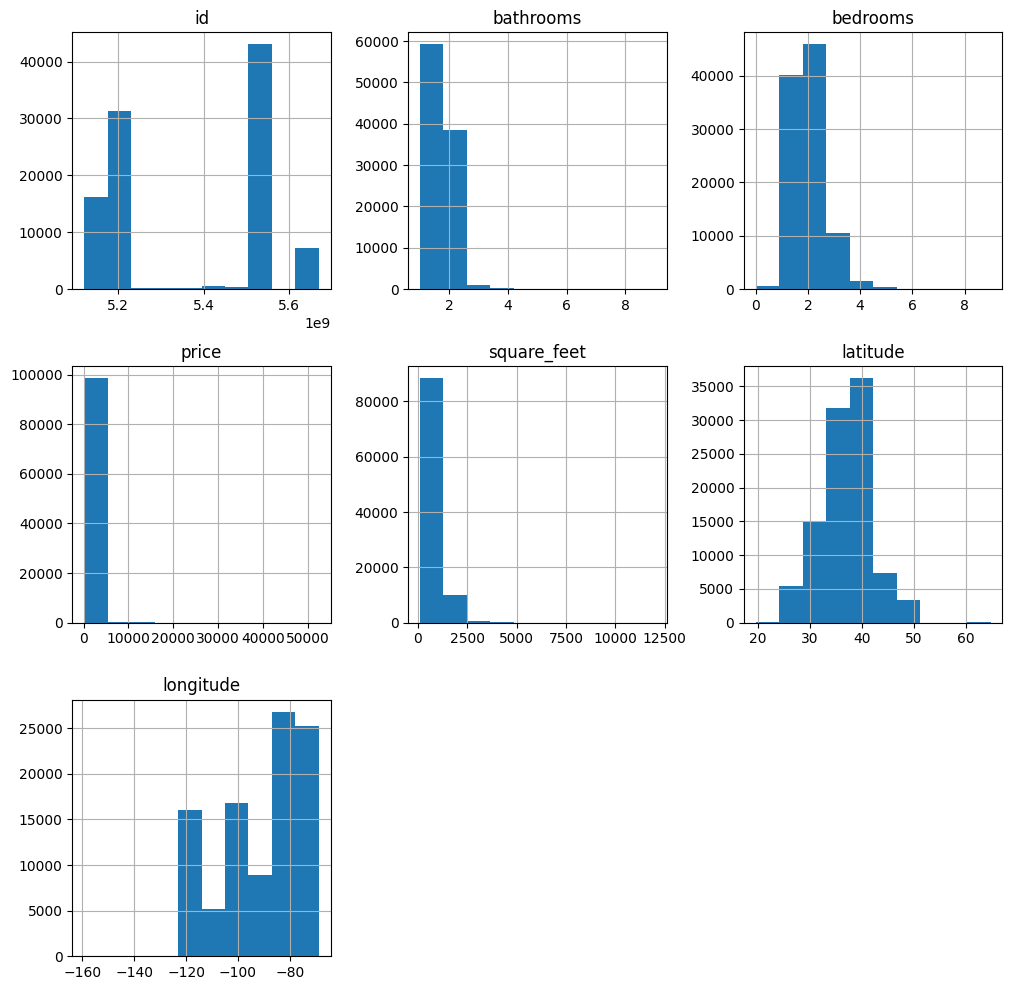

In [20]:
num_df.hist(figsize= (12,12))

<Axes: xlabel='price', ylabel='Count'>

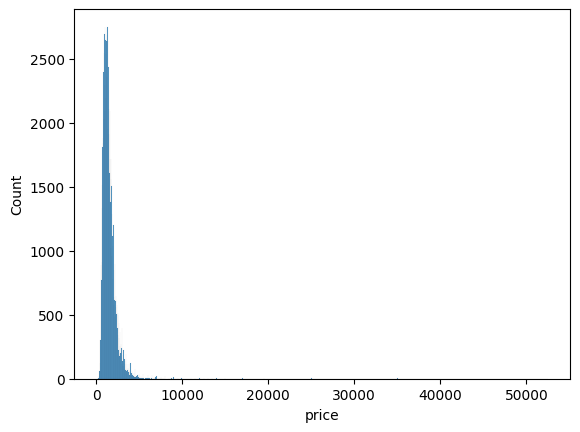

In [21]:
import seaborn as sns

sns.histplot(data = num_df, x = 'price', binrange= (num_df['price'].min(), num_df['price'].max()))

<Axes: >

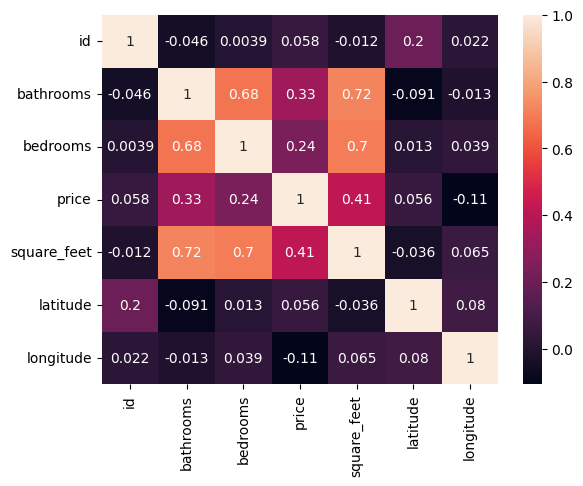

In [22]:
df_corr = num_df.corr()

sns.heatmap(df_corr, annot= True)

In [23]:
df.head()

,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",1.0,1.0,USD,No,Thumbnail,2195.0,"$2,195",Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",1.5,3.0,USD,No,Thumbnail,1250.0,"$1,250",Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,2.0,3.0,USD,No,Thumbnail,1395.0,"$1,395",Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",1.0,2.0,USD,No,Thumbnail,1600.0,"$1,600",Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",1.0,1.0,USD,No,Thumbnail,975.0,$975,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo


In [24]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [25]:
df.nunique()

id               98923
category             7
title            58173
body             94046
bathrooms           16
bedrooms            10
currency             1
fee                  2
has_photo            3
price             3681
price_display     3712
price_type           2
square_feet       2522
cityname          2977
state               51
latitude          7190
longitude         7248
source              25
dtype: int64

In [26]:
df['source'].unique()

array(['RentLingo', 'ListedBuy', 'RentDigs.com', 'RENTCafé', 'GoSection8',
       'Listanza', 'RealRentals', 'RENTOCULAR', 'tenantcloud',
       'Real Estate Agent', 'rentbits', 'Home Rentals', 'Nest Seekers',
       'RentFeeder', 'vFlyer', 'Real Estate Shows', 'Seattle Rentals',
       'Claz', 'BostonApartments', 'SpreadMyAd', 'Apartable', 'Z57',
       'FreeAdsTime', 'AgentWebsite', 'HousesForRent'], dtype=object)

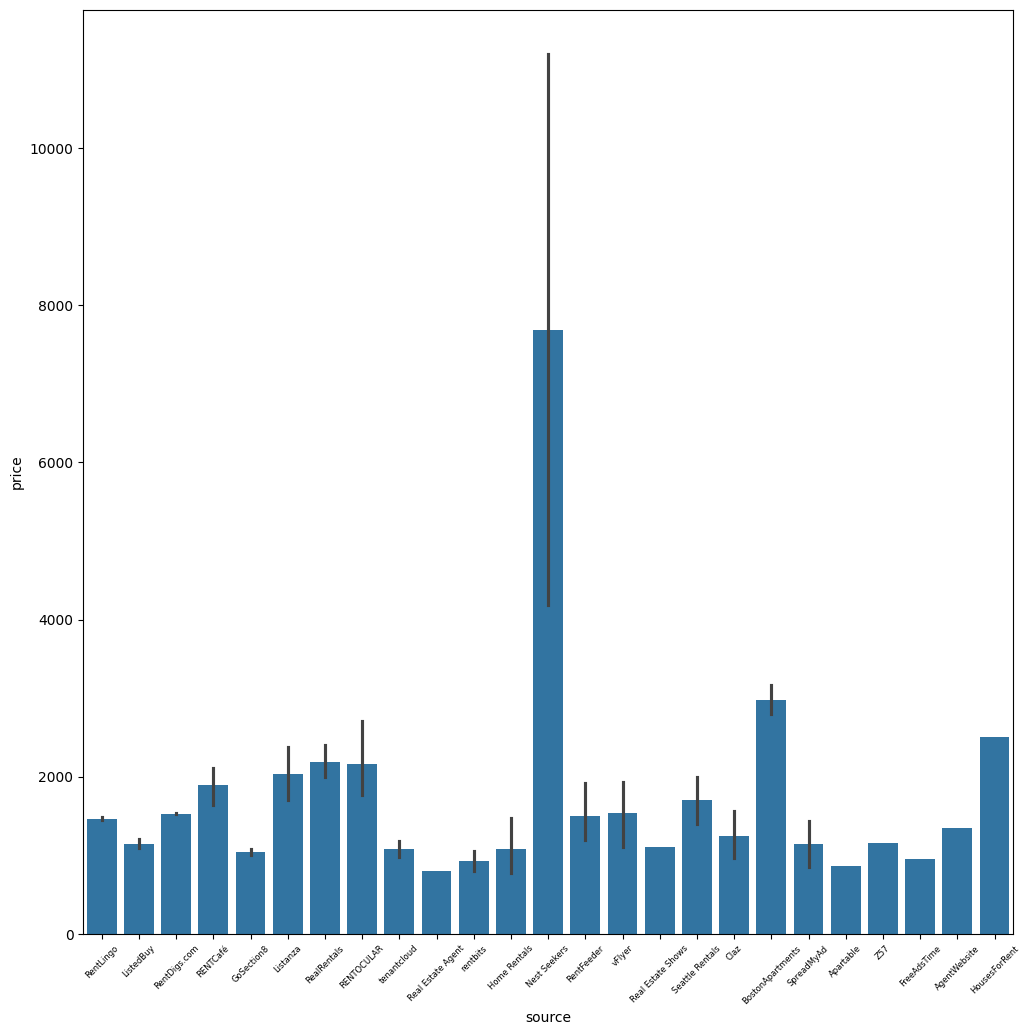

In [27]:
plt.figure(figsize=(12,12))
sns.barplot( data = df, x = 'source', y = 'price')
plt.xticks(fontsize = 6, rotation = 45)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'RentLingo'),
  Text(1, 0, 'ListedBuy'),
  Text(2, 0, 'RentDigs.com'),
  Text(3, 0, 'RENTCafé'),
  Text(4, 0, 'GoSection8'),
  Text(5, 0, 'Listanza'),
  Text(6, 0, 'RealRentals'),
  Text(7, 0, 'RENTOCULAR'),
  Text(8, 0, 'tenantcloud'),
  Text(9, 0, 'Real Estate Agent'),
  Text(10, 0, 'rentbits'),
  Text(11, 0, 'Home Rentals'),
  Text(12, 0, 'Nest Seekers'),
  Text(13, 0, 'RentFeeder'),
  Text(14, 0, 'vFlyer'),
  Text(15, 0, 'Real Estate Shows'),
  Text(16, 0, 'Seattle Rentals'),
  Text(17, 0, 'Claz'),
  Text(18, 0, 'BostonApartments'),
  Text(19, 0, 'SpreadMyAd'),
  Text(20, 0, 'Apartable'),
  Text(21, 0, 'Z57'),
  Text(22, 0, 'FreeAdsTime'),
  Text(23, 0, 'AgentWebsite'),
  Text(24, 0, 'HousesForRent')])

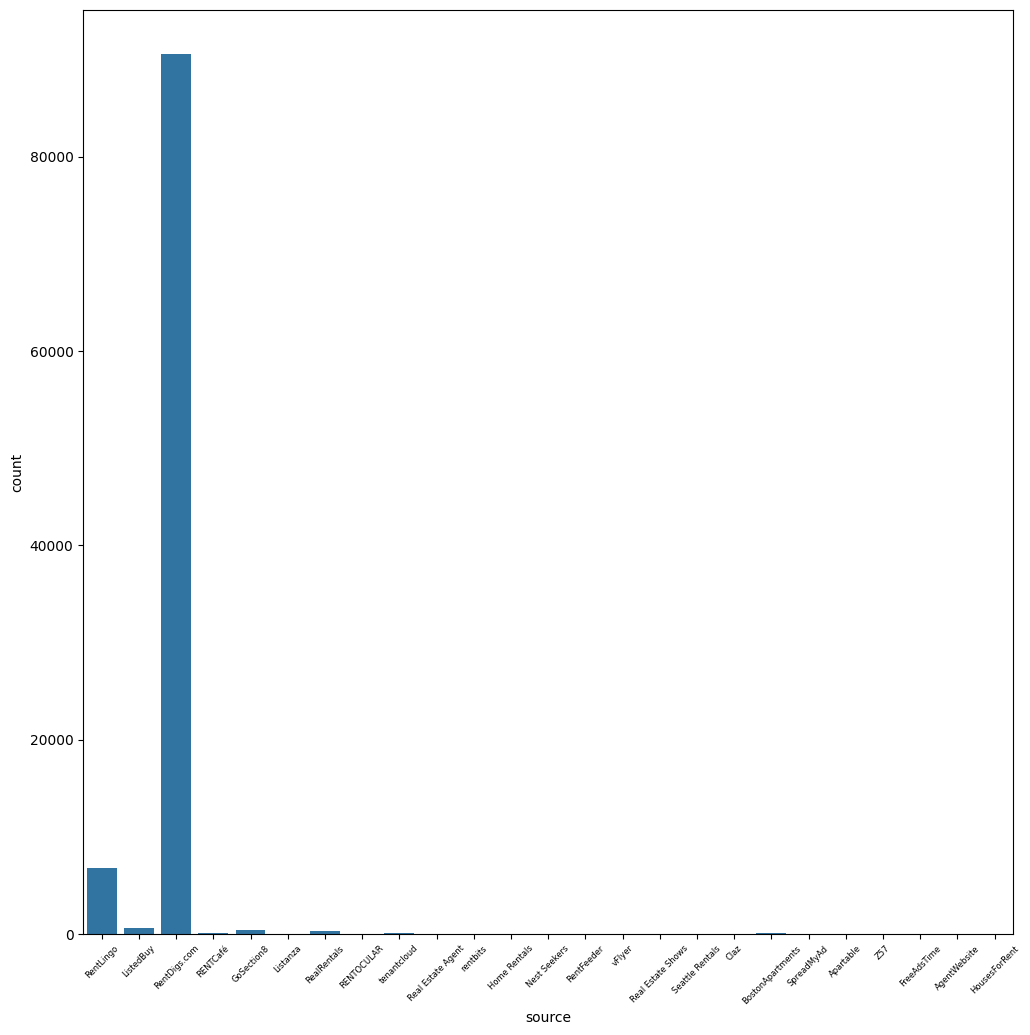

In [28]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x = 'source')
plt.xticks(fontsize = 6, rotation = 45)

In [29]:
df['source'].value_counts()

source
RentDigs.com         90577
RentLingo             6815
ListedBuy              561
GoSection8             434
RealRentals            268
tenantcloud            121
BostonApartments        93
RENTCafé                41
Listanza                25
RENTOCULAR              18
RentFeeder              12
Home Rentals             8
SpreadMyAd               6
Claz                     5
rentbits                 5
vFlyer                   5
Nest Seekers             4
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: count, dtype: int64

In [30]:
df = df[(df['source'] == 'RentDigs.com') | (df['source'] == 'RentLingo')]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97392 entries, 0 to 99491
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             97392 non-null  int64  
 1   category       97392 non-null  object 
 2   title          97392 non-null  object 
 3   body           97392 non-null  object 
 4   bathrooms      97392 non-null  float64
 5   bedrooms       97392 non-null  float64
 6   currency       97392 non-null  object 
 7   fee            97392 non-null  object 
 8   has_photo      97392 non-null  object 
 9   price          97392 non-null  float64
 10  price_display  97392 non-null  object 
 11  price_type     97392 non-null  object 
 12  square_feet    97392 non-null  int64  
 13  cityname       97392 non-null  object 
 14  state          97392 non-null  object 
 15  latitude       97392 non-null  float64
 16  longitude      97392 non-null  float64
 17  source         97392 non-null  object 
dtypes: float64(

In [32]:
df.nunique()

id               97308
category             3
title            56789
body             92500
bathrooms           16
bedrooms            10
currency             1
fee                  1
has_photo            3
price             3666
price_display     3666
price_type           1
square_feet       2515
cityname          2917
state               51
latitude          6862
longitude         6915
source               2
dtype: int64

In [33]:
df.head()

,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",1.0,1.0,USD,No,Thumbnail,2195.0,"$2,195",Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",1.5,3.0,USD,No,Thumbnail,1250.0,"$1,250",Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,2.0,3.0,USD,No,Thumbnail,1395.0,"$1,395",Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",1.0,2.0,USD,No,Thumbnail,1600.0,"$1,600",Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",1.0,1.0,USD,No,Thumbnail,975.0,$975,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo


In [34]:
df = df.drop(['body', 'id', 'fee', 'currency', 'price_display', 'price_type', 'cityname', 'latitude', 'longitude', 'source'], axis = 1)

In [35]:
df = df.drop(['state'], axis = 1)

In [36]:
df.head()

,category,title,bathrooms,bedrooms,has_photo,price,square_feet
0,housing/rent/apartment,One BR 507 & 509 Esplanade,1.0,1.0,Thumbnail,2195.0,542
1,housing/rent/apartment,Three BR 146 Lochview Drive,1.5,3.0,Thumbnail,1250.0,1500
2,housing/rent/apartment,Three BR 3101 Morningside Drive,2.0,3.0,Thumbnail,1395.0,1650
3,housing/rent/apartment,Two BR 209 Aegean Way,1.0,2.0,Thumbnail,1600.0,820
4,housing/rent/apartment,One BR 4805 Marquette NE,1.0,1.0,Thumbnail,975.0,624


In [37]:
df.drop(['title'], axis = 1, inplace = True)

In [38]:
df

,category,bathrooms,bedrooms,has_photo,price,square_feet
0,housing/rent/apartment,1.0,1.0,Thumbnail,2195.0,542
1,housing/rent/apartment,1.5,3.0,Thumbnail,1250.0,1500
2,housing/rent/apartment,2.0,3.0,Thumbnail,1395.0,1650
3,housing/rent/apartment,1.0,2.0,Thumbnail,1600.0,820
4,housing/rent/apartment,1.0,1.0,Thumbnail,975.0,624
...,...,...,...,...,...,...
99487,housing/rent/apartment,1.0,1.0,Yes,780.0,605
99488,housing/rent/apartment,2.0,2.0,Yes,813.0,921
99489,housing/rent/apartment,1.0,1.0,Yes,1325.0,650
99490,housing/rent/apartment,1.0,1.0,Yes,931.0,701


In [39]:
onehot = OneHotEncoder(sparse=False)

df_oh = onehot.fit_transform(df.select_dtypes(include=['object']))

c:\Users\dgmur\python\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
df_oh = pd.DataFrame(df_oh, columns = onehot.get_feature_names_out())

In [41]:
df_oh

,category_housing/rent,category_housing/rent/apartment,category_housing/rent/commercial/retail,has_photo_No,has_photo_Thumbnail,has_photo_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
97387,0.0,1.0,0.0,0.0,0.0,1.0
97388,0.0,1.0,0.0,0.0,0.0,1.0
97389,0.0,1.0,0.0,0.0,0.0,1.0
97390,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
df_after_one_hot = pd.concat([df, df_oh], axis = 1)

In [43]:
df_after_one_hot.head()

,category,bathrooms,bedrooms,has_photo,price,square_feet,category_housing/rent,category_housing/rent/apartment,category_housing/rent/commercial/retail,has_photo_No,has_photo_Thumbnail,has_photo_Yes
0,housing/rent/apartment,1.0,1.0,Thumbnail,2195.0,542.0,0.0,1.0,0.0,0.0,1.0,0.0
1,housing/rent/apartment,1.5,3.0,Thumbnail,1250.0,1500.0,0.0,1.0,0.0,0.0,1.0,0.0
2,housing/rent/apartment,2.0,3.0,Thumbnail,1395.0,1650.0,0.0,1.0,0.0,0.0,1.0,0.0
3,housing/rent/apartment,1.0,2.0,Thumbnail,1600.0,820.0,0.0,1.0,0.0,0.0,1.0,0.0
4,housing/rent/apartment,1.0,1.0,Thumbnail,975.0,624.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
df_after_one_hot.isnull().sum()

category                                   2097
bathrooms                                  2097
bedrooms                                   2097
has_photo                                  2097
price                                      2097
square_feet                                2097
category_housing/rent                      2097
category_housing/rent/apartment            2097
category_housing/rent/commercial/retail    2097
has_photo_No                               2097
has_photo_Thumbnail                        2097
has_photo_Yes                              2097
dtype: int64

In [45]:
df_after_one_hot = df_after_one_hot.drop(['category', 'has_photo'], axis = 1)

In [46]:
df_after_one_hot.dropna(inplace=True)

In [47]:
df = df_after_one_hot

In [48]:
df.head()

,bathrooms,bedrooms,price,square_feet,category_housing/rent,category_housing/rent/apartment,category_housing/rent/commercial/retail,has_photo_No,has_photo_Thumbnail,has_photo_Yes
0,1.0,1.0,2195.0,542.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.5,3.0,1250.0,1500.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,3.0,1395.0,1650.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,2.0,1600.0,820.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,975.0,624.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
from sklearn.preprocessing import StandardScaler

stanscale = StandardScaler()

In [50]:
scaled_df = stanscale.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [51]:
x = scaled_df.drop(['price'], axis = 1)

y = scaled_df['price']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=7)

In [53]:
print(x_train.shape, y_train.shape)

(76236, 9) (76236,)


In [54]:
base_lr = LinearRegression()

base_lr.fit(x_train, y_train)

predictions = base_lr.predict(x_test)

r_square_base_lr = r2_score(y_test, predictions)

rmse_base_lr = mean_squared_error(y_test, predictions, squared=True)


In [55]:
print('r_squared for baseline linear regression: {}'.format(r_square_base_lr), '\n', 'root mean squared error for baseline linear regression: {}'.format(rmse_base_lr))

r_squared for baseline linear regression: 0.21267259242800196 
 root mean squared error for baseline linear regression: 1.0143366713522812


In [56]:
predictions2 = base_lr.predict(x_train)

r_square_base_lr2 = r2_score(y_train, predictions2)

rmse_base_lr2 = mean_squared_error(y_train, predictions2, squared=True)


In [57]:
print('r_squared for baseline linear regression: {}'.format(r_square_base_lr2), '\n', 'root mean squared error for baseline linear regression: {}'.format(rmse_base_lr2))

r_squared for baseline linear regression: 0.17876608686803164 
 root mean squared error for baseline linear regression: 0.7620247949571843


In [58]:
base_lasso = LassoCV()

base_lasso.fit(x_train, y_train)

predict_base_lasso_train = base_lasso.predict(x_train)

r_square_base_lasso_train = r2_score(y_train, predict_base_lasso_train)

rmse_base_lasso_train = mean_squared_error(y_train, predict_base_lasso_train, squared=True)

In [59]:
print('r_squared for baseline lasso linear regression: {}'.format(r_square_base_lasso_train), '\n', 'root mean squared error for baseline lasso linear regression: {}'.format(rmse_base_lasso_train))

r_squared for baseline lasso linear regression: 0.1787732382808399 
 root mean squared error for baseline lasso linear regression: 0.7620181591451559


In [60]:
predict_base_lasso_test = base_lasso.predict(x_test)

r_square_base_lasso_test = r2_score(y_test, predict_base_lasso_test)

rmse_base_lasso_test = mean_squared_error(y_test, predict_base_lasso_test, squared=True)

In [61]:
print('r_squared for baseline lasso linear regression: {}'.format(r_square_base_lasso_test), '\n', 'root mean squared error for baseline lasso linear regression: {}'.format(rmse_base_lasso_test))

r_squared for baseline lasso linear regression: 0.2124280055030039 
 root mean squared error for baseline lasso linear regression: 1.0146517797620391


In [62]:
base_rf = RandomForestRegressor()

base_rf.fit(x_train, y_train)

base_rf_predict_train = base_rf.predict(x_train)

r_square_base_rf_train = r2_score(y_train, base_rf_predict_train)

rmse_base_rf_train = mean_squared_error(y_train, base_rf_predict_train, squared=True)

In [63]:
print('r_squared for baseline random forest; {}'.format(r_square_base_rf_train), '\n', 'root mean squared error for baseline random forest: {}'.format(rmse_base_rf_train))

r_squared for baseline random forest; 0.5264724931220086 
 root mean squared error for baseline random forest: 0.43938723859946455


In [65]:
base_rf_predict_test = base_rf.predict(x_test)

r_square_base_rf_test = r2_score(y_test, base_rf_predict_test)

rmse_base_rf_test = mean_squared_error(y_test, base_rf_predict_test, squared=True)

In [66]:
print('r_squared for baseline random forest; {}'.format(r_square_base_rf_test), '\n', 'root mean squared error for baseline random forest: {}'.format(rmse_base_rf_test))

r_squared for baseline random forest; 0.2621667351196403 
 root mean squared error for baseline random forest: 0.9505719357842763


In [67]:
param_grid = {'n_estimators': [100,250, 500], 'max_depth': [2,4,6,8,10,12]}
clf_rf_train = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv = 5, scoring= 'neg_root_mean_squared_error')

clf_rf_train.fit(x_train, y_train)

print("grid search best score: {}".format(clf_rf_train.best_score_), '\n', "grid search best parameters: {}".format(clf_rf_train.best_estimator_))

grid search best score: -0.8586973627626554 
 grid search best parameters: RandomForestRegressor(max_depth=8, n_estimators=250)


In [68]:
ag_rf = RandomForestRegressor(n_estimators=250, max_depth=8)

ag_rf.fit(x_train, y_train)

ag_rf_predict = ag_rf.predict(x_test)

r_square_ag_rf = r2_score(y_test, ag_rf_predict)

rmse_ag_rf = mean_squared_error(y_test, ag_rf_predict)

In [69]:
print("r_squared for after grid search random forest: {}".format(r_square_ag_rf), '\n', "rmse for after grid search random forest: {}".format(rmse_ag_rf))

r_squared for after grid search random forest: 0.31023351020501766 
 rmse for after grid search random forest: 0.8886461191877266


In [72]:
nn_model_1 = Sequential()

n_features = 9 
nn_model_1.add(Dense(25, input_shape = (9,), activation = 'relu'))
nn_model_1.add(Dense(10, activation = 'relu'))
nn_model_1.add(Dense(1))

nn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                250       
                                                                 
 dense_3 (Dense)             (None, 10)                260       


                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
nn_model_1.compile(optimizer='adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [77]:
nn_model_1.fit(x_train, y_train, epochs=50)

Epoch 1/50


2383/2383 [==============================] - 2s 464us/step - loss: 0.7885 - root_mean_squared_error: 0.8880
Epoch 2/50
2383/2383 [==============================] - 1s 415us/step - loss: 0.7470 - root_mean_squared_error: 0.8643
Epoch 3/50
2383/2383 [==============================] - 1s 415us/step - loss: 0.7485 - root_mean_squared_error: 0.8652
Epoch 4/50
2383/2383 [==============================] - 1s 432us/step - loss: 0.7396 - root_mean_squared_error: 0.8600
Epoch 5/50
2383/2383 [==============================] - 1s 414us/step - loss: 0.7413 - root_mean_squared_error: 0.8610
Epoch 6/50
2383/2383 [==============================] - 1s 420us/step - loss: 0.7381 - root_mean_squared_error: 0.8591
Epoch 7/50
2383/2383 [==============================] - 1s 439us/step - loss: 0.7335 - root_mean_squared_error: 0.8565
Epoch 8/50
2383/2383 [==============================] - 1s 434us/step - loss: 0.7344 - root_mean_squared_error: 0.8570
Epoch 9/50
2383/2383 [==============================] - 1s 

In [78]:
nn_1_predict = nn_model_1.predict(x_test)

r_square_nn_1 = r2_score(y_test, nn_1_predict)

rmse_nn_1 = mean_squared_error(y_test, nn_1_predict)

596/596 [==============================] - 0s 344us/step


In [80]:
print("r square for neural network 1: {}".format(r_square_nn_1), '\n', "rmse for neural network 1: {}".format(rmse_nn_1))

r square for neural network 1: 0.32660498890183076 
 rmse for neural network 1: 0.8675542696639673


In [81]:
nn_model_2 = Sequential()

n_features = 9 
nn_model_2.add(Dense(30, input_shape = (9,), activation = 'relu'))
nn_model_2.add(Dense(15, activation = 'relu'))
nn_model_2.add(Dense(10, activation = 'relu'))
nn_model_2.add(Dense(1))

nn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                300       
                                                                 
 dense_6 (Dense)             (None, 15)                465       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 936 (3.66 KB)
Trainable params: 936 (3.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
nn_model_2.compile(optimizer='adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

nn_model_2.fit(x_train, y_train, epochs=50)

Epoch 1/50
2383/2383 [==============================] - 1s 486us/step - loss: 0.7697 - root_mean_squared_error: 0.8773
Epoch 2/50
2383/2383 [==============================] - 1s 465us/step - loss: 0.7419 - root_mean_squared_error: 0.8613
Epoch 3/50
2383/2383 [==============================] - 1s 473us/step - loss: 0.7396 - root_mean_squared_error: 0.8600
Epoch 4/50
2383/2383 [==============================] - 1s 468us/step - loss: 0.7367 - root_mean_squared_error: 0.8583
Epoch 5/50
2383/2383 [==============================] - 1s 489us/step - loss: 0.7322 - root_mean_squared_error: 0.8557
Epoch 6/50
2383/2383 [==============================] - 1s 546us/step - loss: 0.7307 - root_mean_squared_error: 0.8548
Epoch 7/50
2383/2383 [==============================] - 1s 482us/step - loss: 0.7322 - root_mean_squared_error: 0.8557
Epoch 8/50
2383/2383 [==============================] - 1s 524us/step - loss: 0.7334 - root_mean_squared_error: 0.8564
Epoch 9/50
2383/2383 [==========================

In [84]:
nn_2_predict = nn_model_2.predict(x_test)

r_square_nn_2 = r2_score(y_test, nn_2_predict)

rmse_nn_2 = mean_squared_error(y_test, nn_2_predict)

print("r square for neural network 2: {}".format(r_square_nn_2), '\n', "rmse for neural network 2: {}".format(rmse_nn_2))

596/596 [==============================] - 0s 331us/step
r square for neural network 2: 0.3328350892519708 
 rmse for neural network 2: 0.8595278511872627


In [86]:
from tensorflow.keras.layers import Conv1D

In [97]:
nn_model_3 = Sequential()
n_features = 9 
nn_model_3.add(Dense(40, input_shape = (9, ), activation = 'relu'))
nn_model_3.add(Dense(20, activation = 'relu'))
nn_model_3.add(Dense(15, activation = 'relu'))
nn_model_3.add(Dense(10, activation = 'relu'))
nn_model_3.add(Dense(1))

nn_model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 40)                400       
                                                                 
 dense_19 (Dense)            (None, 20)                820       
                                                                 
 dense_20 (Dense)            (None, 15)                315       
                                                                 
 dense_21 (Dense)            (None, 10)                160       
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1706 (6.66 KB)
Trainable params: 1706 (6.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
nn_model_3.compile(optimizer='adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

nn_model_3.fit(x_train, y_train, epochs=50)

Epoch 1/50
2383/2383 [==============================] - 2s 523us/step - loss: 0.7533 - root_mean_squared_error: 0.8679
Epoch 2/50
2383/2383 [==============================] - 1s 542us/step - loss: 0.7438 - root_mean_squared_error: 0.8624
Epoch 3/50
2383/2383 [==============================] - 1s 537us/step - loss: 0.7380 - root_mean_squared_error: 0.8591
Epoch 4/50
2383/2383 [==============================] - 1s 521us/step - loss: 0.7369 - root_mean_squared_error: 0.8584
Epoch 5/50
2383/2383 [==============================] - 1s 525us/step - loss: 0.7380 - root_mean_squared_error: 0.8591
Epoch 6/50
2383/2383 [==============================] - 1s 535us/step - loss: 0.7326 - root_mean_squared_error: 0.8559
Epoch 7/50
2383/2383 [==============================] - 1s 527us/step - loss: 0.7345 - root_mean_squared_error: 0.8570
Epoch 8/50
2383/2383 [==============================] - 1s 544us/step - loss: 0.7327 - root_mean_squared_error: 0.8560
Epoch 9/50
2383/2383 [==========================

In [99]:
nn_3_predict = nn_model_3.predict(x_test)

r_square_nn_3 = r2_score(y_test, nn_3_predict)

rmse_nn_3 = mean_squared_error(y_test, nn_3_predict)

print("r square for neural network 2: {}".format(r_square_nn_3), '\n', "rmse for neural network 2: {}".format(rmse_nn_3))

596/596 [==============================] - 0s 505us/step
r square for neural network 2: 0.3631347520088968 
 rmse for neural network 2: 0.8204919192885674


In [103]:
print("linear regression: {}".format(rmse_base_lr), '\n', "lasso: {}".format(rmse_base_lasso_test), '\n', 
      "baseline random forest: {}".format(rmse_base_rf_test), '\n', "random forest after grid search: {}".format(rmse_ag_rf), '\n',
      'neural network 1: {}'.format(rmse_nn_1), '\n', 'neural network 2: {}'.format(rmse_nn_2), '\n', 'neural network 3: {}'.format(rmse_nn_3))

linear regression: 1.0143366713522812 
 lasso: 1.0146517797620391 
 baseline random forest: 0.9505719357842763 
 random forest after grid search: 0.8886461191877266 
 neural network 1: 0.8675542696639673 
 neural network 2: 0.8595278511872627 
 neural network 3: 0.8204919192885674
